In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [3]:
# Raw data from Kafka logs
data_producer = """
Scenario, Records Sent, Throughput (records/sec), Throughput (MB/sec), Avg Latency (ms), Max Latency (ms), 50th Percentile Latency (ms), 95th Percentile Latency (ms), 99th Percentile Latency (ms), 99.9th Percentile Latency (ms)
Scenario 1, 5001, 1000.0, 0.95, 2.3, 328.0, 1, 4, 23, 26
Scenario 1, 10000, 995.024876, 0.95, 1.6, 328.0, 1, 4, 23, 26
Scenario 2, 36600, 7320.0, 69.81, 260.1, 639.0, 206, 506, 597, 636
Scenario 2, 48504, 9700.8, 92.51, 208.7, 351.0, 206, 506, 597, 636
Scenario 2, 100000, 7987.858455, 76.18, 248.02, 639.0, 206, 506, 597, 636
Scenario 3, 12869, 2573.8, 122.73, 241.2, 379.0, None, None, None, None
Scenario 3, 13460, 2692.0, 128.36, 251.9, 472.0, None, None, None, None
Scenario 3, 17860, 3572.0, 170.33, 187.2, 567.0, None, None, None, None
Scenario 3, 22138, 4427.6, 211.12, 151.1, 476.0, None, None, None, None
Scenario 3, 30836, 6166.0, 294.02, 108.1, 256.0, None, None, None, None
Scenario 3, 32269, 6453.8, 307.74, 80.8, 268.0, None, None, None, None
Scenario 3, 27610, 5522.0, 263.31, 95.4, 482.0, None, None, None, None
Scenario 3, 35457, 7091.4, 338.14, 11.3, 67.0, None, None, None, None
Scenario 3, 34466, 6893.2, 328.69, 6.4, 48.0, None, None, None, None
Scenario 3, 33472, 6694.4, 319.21, 15.2, 77.0, None, None, None, None
Scenario 3, 34932, 6986.4, 333.14, 12.3, 99.0, None, None, None, None
Scenario 3, 32346, 6469.2, 308.48, 25.4, 319.0, None, None, None, None
Scenario 3, 33313, 6662.6, 317.7, 48.9, 266.0, None, None, None, None
Scenario 3, 27488, 5496.5, 262.09, 97.3, 385.0, None, None, None, None
Scenario 3, 30611, 6121.0, 291.87, 85.8, 271.0, None, None, None, None
Scenario 3, 32762, 6547.2, 312.19, 58.5, 331.0, None, None, None, None
Scenario 3, 34642, 6928.4, 330.37, 5.0, 79.0, None, None, None, None
Scenario 3, 500000, 5747.192496, 274.05, 66.67, 567.0, 43, 233, 345, 476
"""

# Read the data into a pandas DataFrame
from io import StringIO

df = pd.read_csv(StringIO(data_producer))

# Display the DataFrame to ensure it's parsed correctly
df

,Scenario,Records Sent,Throughput (records/sec),Throughput (MB/sec),Avg Latency (ms),Max Latency (ms),50th Percentile Latency (ms),95th Percentile Latency (ms),99th Percentile Latency (ms),99.9th Percentile Latency (ms)
0,Scenario 1,5001,1000.000000,0.95,2.30,328.0,1,4,23,26
1,Scenario 1,10000,995.024876,0.95,1.60,328.0,1,4,23,26
2,Scenario 2,36600,7320.000000,69.81,260.10,639.0,206,506,597,636
3,Scenario 2,48504,9700.800000,92.51,208.70,351.0,206,506,597,636
4,Scenario 2,100000,7987.858455,76.18,248.02,639.0,206,506,597,636
5,Scenario 3,12869,2573.800000,122.73,241.20,379.0,None,None,None,None
6,Scenario 3,13460,2692.000000,128.36,251.90,472.0,None,None,None,None
7,Scenario 3,17860,3572.000000,170.33,187.20,567.0,None,None,None,None
8,Scenario 3,22138,4427.600000,211.12,151.10,476.0,None,None,None,None
9,Scenario 3,30836,6166.000000,294.02,108.10,256.0,None,None,None,None


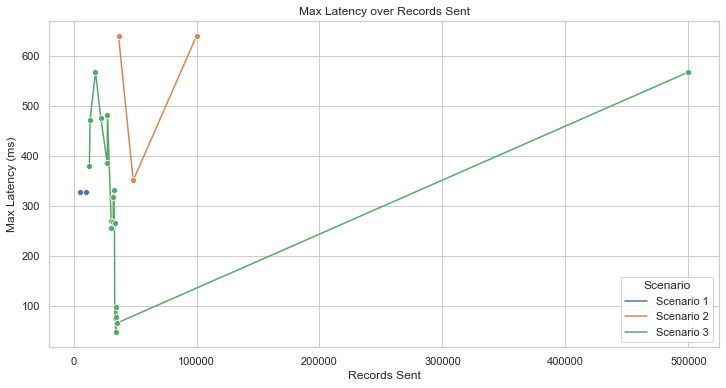

In [9]:


sns.set(style="whitegrid")

# Max Latency over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=" Records Sent", y=" Max Latency (ms)", hue="Scenario", marker="o")
plt.title("Max Latency over Records Sent")
plt.xlabel("Records Sent")
plt.ylabel("Max Latency (ms)")
plt.legend(title="Scenario")
plt.show()

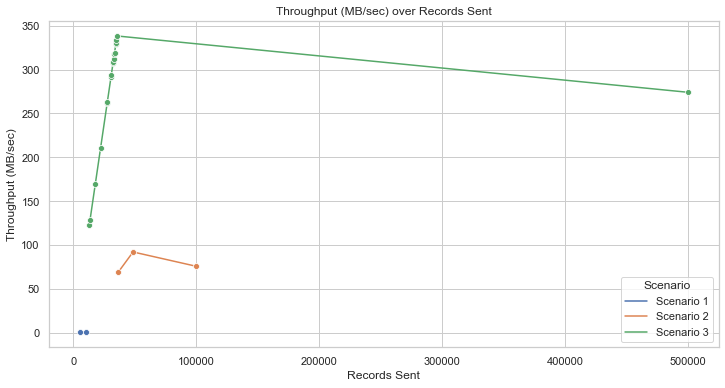

In [10]:
# Throughput (MB/sec) over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=" Records Sent", y=" Throughput (MB/sec)", hue="Scenario", marker="o")
plt.title("Throughput (MB/sec) over Records Sent")
plt.xlabel("Records Sent")
plt.ylabel("Throughput (MB/sec)")
plt.legend(title="Scenario")
plt.show()

In [13]:
data_consumer = """
Scenario,Start Time,End Time,Data Consumed (MB),MB/sec,Data Consumed (nMsg),nMsg/sec,Rebalance Time (ms),Fetch Time (ms),Fetch MB/sec,Fetch nMsg/sec
Scenario 1,2024-06-01 15:56:57:116,2024-06-01 15:57:01:004,9.7084,2.4970,10018,2576.6461,3751,137,70.8643,73124.0876
Scenario 2,2024-06-01 15:57:13:948,2024-06-01 15:57:20:091,868.6256,141.4009,100082,16292.0397,3201,2942,295.2500,34018.3549
Scenario 3,2024-06-01 15:57:41:338,2024-06-01 15:58:16:959,19560.6709,549.1331,500017,14037.1410,3206,32415,603.4450,15425.4820
"""

df_consumer = pd.read_csv(StringIO(data_consumer))

# Display the DataFrame to ensure it's parsed correctly
print(df_consumer.dtypes)
df_consumer


Scenario                 object
Start Time               object
End Time                 object
Data Consumed (MB)      float64
MB/sec                  float64
Data Consumed (nMsg)      int64
nMsg/sec                float64
Rebalance Time (ms)       int64
Fetch Time (ms)           int64
Fetch MB/sec            float64
Fetch nMsg/sec          float64
dtype: object


,Scenario,Start Time,End Time,Data Consumed (MB),MB/sec,Data Consumed (nMsg),nMsg/sec,Rebalance Time (ms),Fetch Time (ms),Fetch MB/sec,Fetch nMsg/sec
0,Scenario 1,2024-06-01 15:56:57:116,2024-06-01 15:57:01:004,9.7084,2.4970,10018,2576.6461,3751,137,70.8643,73124.0876
1,Scenario 2,2024-06-01 15:57:13:948,2024-06-01 15:57:20:091,868.6256,141.4009,100082,16292.0397,3201,2942,295.2500,34018.3549
2,Scenario 3,2024-06-01 15:57:41:338,2024-06-01 15:58:16:959,19560.6709,549.1331,500017,14037.1410,3206,32415,603.4450,15425.4820


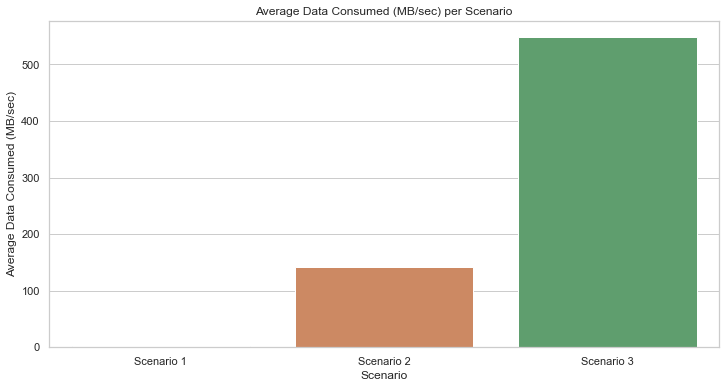

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_consumer, x="Scenario", y="MB/sec")
plt.title("Average Data Consumed (MB/sec) per Scenario")
plt.xlabel("Scenario")
plt.ylabel("Average Data Consumed (MB/sec)")
plt.show()

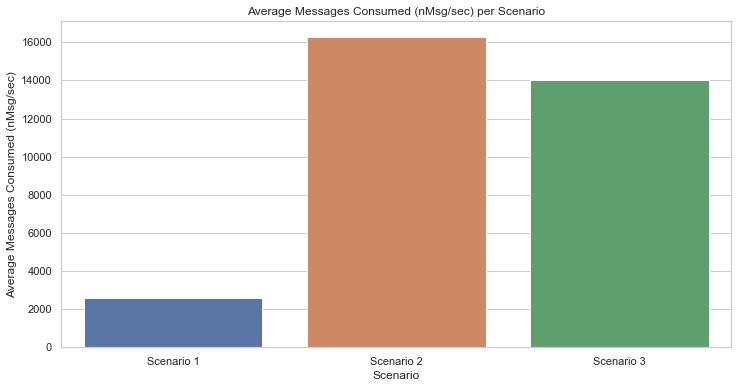

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_consumer, x="Scenario", y="nMsg/sec")
plt.title("Average Messages Consumed (nMsg/sec) per Scenario")
plt.xlabel("Scenario")
plt.ylabel("Average Messages Consumed (nMsg/sec)")
plt.show()

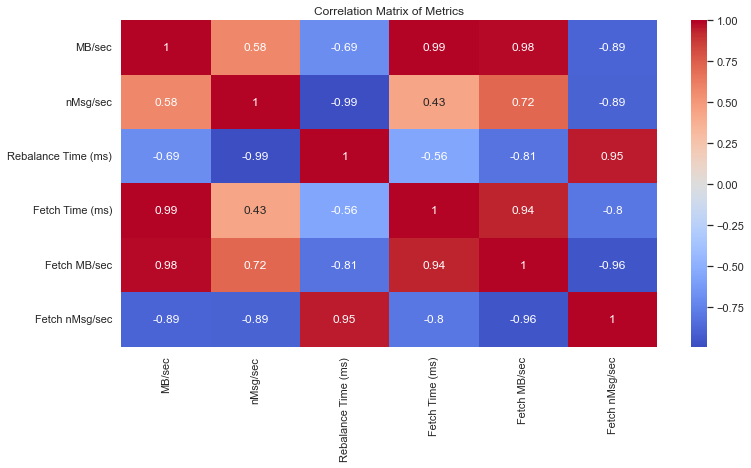

In [19]:
corr = df_consumer[["MB/sec", "nMsg/sec", "Rebalance Time (ms)", "Fetch Time (ms)", "Fetch MB/sec", "Fetch nMsg/sec"]].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Metrics")
plt.show()